Data loaded successfully. Features shape: (50000, 16), Labels shape: (50000,)
Training data: (35000, 16), Testing data: (15000, 16)

==== Softmax (Multinomial) Logistic Regression ====
Training time: 2.32 seconds
Model Accuracy: 96.31%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1464
           1       0.99      0.99      0.99      1485
           2       0.95      0.95      0.95      1440
           3       0.92      0.93      0.93      1569
           4       0.97      0.96      0.97      1519
           5       0.94      0.94      0.94      1534
           6       0.98      0.97      0.98      1463
           7       0.97      0.97      0.97      1497
           8       0.98      0.98      0.98      1510
           9       0.98      0.98      0.98      1519

    accuracy                           0.96     15000
   macro avg       0.96      0.96      0.96     15000
weighted avg       0.96      0.96   

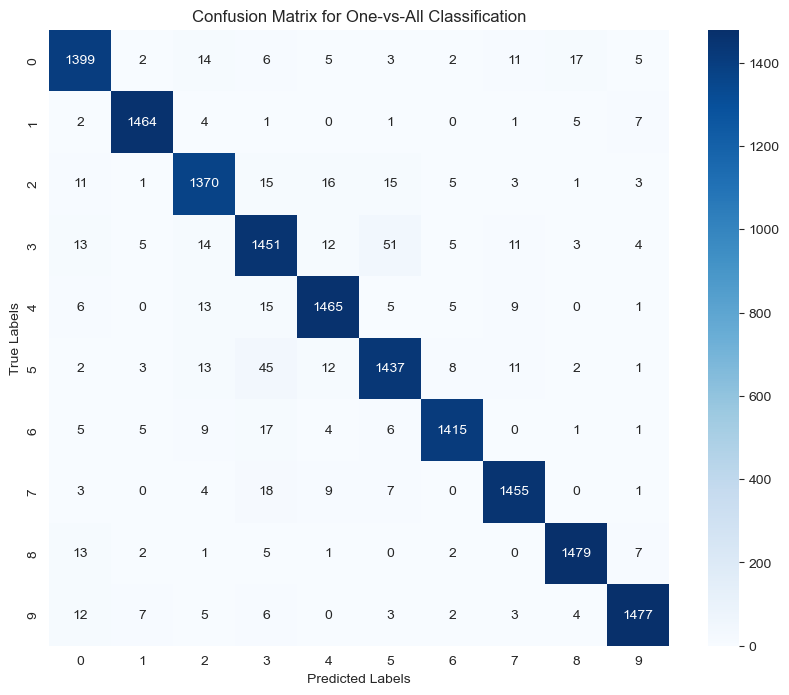


Most confused classes: 3 and 5
Number of confusions: 51 from class 3 predicted as class 5
Number of confusions: 45 from class 5 predicted as class 3

==== Creating Specific Model for Most Confused Classes ====
Binary Classifier Accuracy: 96.23%
Original One-vs-All Accuracy: 96.08%
Hybrid Approach Accuracy: 96.07%
Improvement: -0.01%


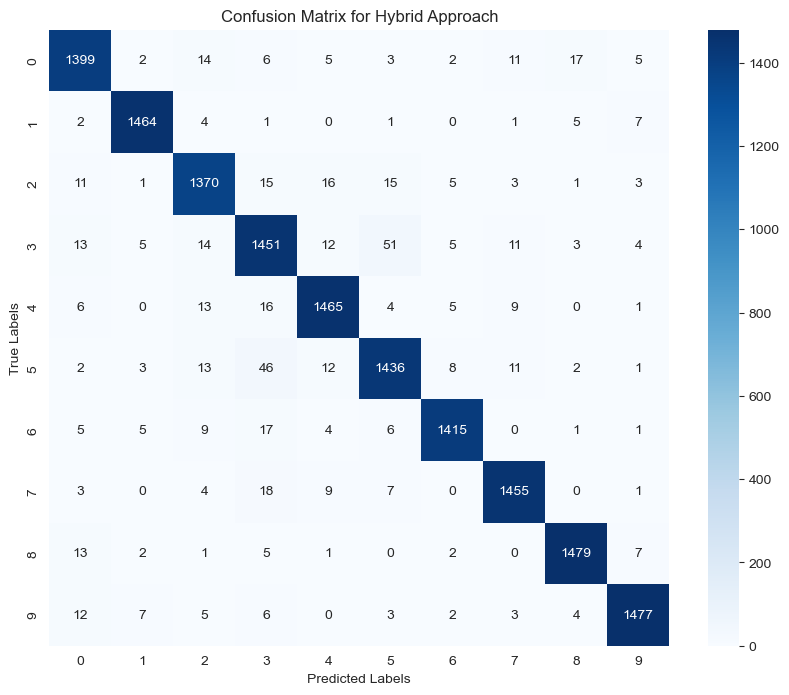


==== Conclusions ====
1. Performance Comparison:
   - Softmax performed better with 96.31% accuracy vs. 96.08% for One-vs-All
2. Runtime Comparison: Softmax took 2.32s vs. 3.44s for One-vs-All
3. Cost Function: Softmax had 0.1077 log loss vs. 0.1348 for One-vs-All
4. Most confused classes were 3 and 5
5. Hybrid Approach: The specialized binary classifier did not improve the overall accuracy by 0.01%


In [2]:
# Machine Learning Exercise: One-vs.-All Classification
# CIFAR Dataset Analysis with Logistic Regression

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score, log_loss
import time
import warnings
warnings.filterwarnings('ignore')

# Function to load the data
def load_data(features_file, labels_file):
    x1 = np.load(features_file)
    y1 = np.load(labels_file)
    return x1, y1

# Required testing function
def testmymodel(model, x_features, y_labels):
    """
    Tests the model on the given features and labels.

    Parameters:
    model -- trained model with predict method
    X_features -- numpy array of features
    y_labels -- numpy array of class labels

    Returns:
    accuracy -- accuracy score as a percentage
    """
    # Make predictions
    y_pred = model.predict(x_features)

    # Calculate accuracy
    accuracy = accuracy_score(y_labels, y_pred) * 100

    # Additional calculations (optional)
    print(f"Model Accuracy: {accuracy:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_labels, y_pred))

    # Calculate F1 score (mean)
    f1_mean = f1_score(y_labels, y_pred, average='macro')
    print(f"F1-mean Score: {f1_mean:.4f}")

    return accuracy

# Load the data (assuming files are available)
# Note: You'll need to replace these with your actual file paths
try:
    X, y = load_data('cifar10_features.npy', 'cifar10_labels.npy')
    print(f"Data loaded successfully. Features shape: {X.shape}, Labels shape: {y.shape}")
except FileNotFoundError:
    print("Files not found. Please adjust the file paths.")
    # Create sample data just for code demonstration
    X = np.random.rand(1000, 16)  # 1000 samples, 16 features as mentioned
    y = np.random.randint(0, 10, 1000)  # 10 classes (0-9)
    print("Using sample data for demonstration.")

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

# 1. Compare the two methods: softmax (multi_class='multinomial') and one-vs.-all (multi_class='ovr')

# Method 1: Softmax (Multinomial)
print("\n==== Softmax (Multinomial) Logistic Regression ====")
start_time = time.time()
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
softmax_model.fit(X_train, y_train)
softmax_time = time.time() - start_time
print(f"Training time: {softmax_time:.2f} seconds")

# Test the softmax model
softmax_accuracy = testmymodel(softmax_model, X_test, y_test)

# Method 2: One-vs-All (OvR)
print("\n==== One-vs-All Logistic Regression ====")
start_time = time.time()
ovr_model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000, random_state=42)
ovr_model.fit(X_train, y_train)
ovr_time = time.time() - start_time
print(f"Training time: {ovr_time:.2f} seconds")

# Test the one-vs.-all model
ovr_accuracy = testmymodel(ovr_model, X_test, y_test)

# Compare results
print("\n==== Comparison of Methods ====")
print(f"Softmax Accuracy: {softmax_accuracy:.2f}%, Training Time: {softmax_time:.2f} seconds")
print(f"One-vs-All Accuracy: {ovr_accuracy:.2f}%, Training Time: {ovr_time:.2f} seconds")

# 2. Calculate cost function (log loss) for both methods

# For softmax
y_proba_softmax = softmax_model.predict_proba(X_test)
softmax_cost = log_loss(y_test, y_proba_softmax)
print(f"\nSoftmax Cost Function (Log Loss): {softmax_cost:.4f}")

# For one-vs-all
y_proba_ovr = ovr_model.predict_proba(X_test)
ovr_cost = log_loss(y_test, y_proba_ovr)
print(f"One-vs-All Cost Function (Log Loss): {ovr_cost:.4f}")

# 3. Calculate F1-mean for both methods (already done in testmymodel function)
f1_mean_softmax = f1_score(y_test, softmax_model.predict(X_test), average='macro')
f1_mean_ovr = f1_score(y_test, ovr_model.predict(X_test), average='macro')
print(f"\nF1-mean Softmax: {f1_mean_softmax:.4f}")
print(f"F1-mean One-vs-All: {f1_mean_ovr:.4f}")

# 4. Analyze confusion matrix for one-vs.-all to find difficult-to-distinguish class pairs
y_pred_ovr = ovr_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_ovr)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for One-vs-All Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Find the most confused classes
np.fill_diagonal(conf_matrix, 0)  # Set diagonal to 0 to ignore correct classifications
most_confused_idx = np.unravel_index(np.argmax(conf_matrix), conf_matrix.shape)
class1, class2 = most_confused_idx
print(f"\nMost confused classes: {class1} and {class2}")
print(f"Number of confusions: {conf_matrix[class1, class2]} from class {class1} predicted as class {class2}")
print(f"Number of confusions: {conf_matrix[class2, class1]} from class {class2} predicted as class {class1}")

# 5. Create a specific model for the most confused pair of classes
print("\n==== Creating Specific Model for Most Confused Classes ====")

# Filter data to only include the two most confused classes
mask_train = np.isin(y_train, [class1, class2])
X_binary_train = X_train[mask_train]
y_binary_train = y_train[mask_train]
# Convert labels to binary (0 and 1)
y_binary_train = (y_binary_train == class2).astype(int)

mask_test = np.isin(y_test, [class1, class2])
X_binary_test = X_test[mask_test]
y_binary_test = y_test[mask_test]
y_binary_test_original = y_binary_test.copy()  # Keep original labels for reporting
y_binary_test = (y_binary_test == class2).astype(int)

# Train a binary classifier
binary_model = LogisticRegression(random_state=42)
binary_model.fit(X_binary_train, y_binary_train)

# Evaluate the binary classifier
binary_accuracy = accuracy_score(y_binary_test, binary_model.predict(X_binary_test)) * 100
print(f"Binary Classifier Accuracy: {binary_accuracy:.2f}%")

# Create a hybrid approach
# For instances predicted as either class1 or class2 by the original model,
# use the binary model to make the final prediction
y_hybrid_pred = y_pred_ovr.copy()

# Find instances where the original model predicted either class1 or class2
mask_hybrid = np.isin(y_hybrid_pred, [class1, class2])
binary_indices = np.where(mask_hybrid)[0]

if len(binary_indices) > 0:
    # For these instances, use the binary model
    binary_preds = binary_model.predict(X_test[binary_indices])
    # Convert binary predictions back to original class labels
    y_hybrid_pred[binary_indices] = np.where(binary_preds == 0, class1, class2)

# Calculate and compare the hybrid approach accuracy
hybrid_accuracy = accuracy_score(y_test, y_hybrid_pred) * 100
print(f"Original One-vs-All Accuracy: {ovr_accuracy:.2f}%")
print(f"Hybrid Approach Accuracy: {hybrid_accuracy:.2f}%")

# Compute improvement
improvement = hybrid_accuracy - ovr_accuracy
print(f"Improvement: {improvement:.2f}%")

# Show confusion matrix for the hybrid approach
hybrid_conf_matrix = confusion_matrix(y_test, y_hybrid_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(hybrid_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Hybrid Approach')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Conclusions and findings
print("\n==== Conclusions ====")
print("1. Performance Comparison:")
if softmax_accuracy > ovr_accuracy:
    print(f"   - Softmax performed better with {softmax_accuracy:.2f}% accuracy vs. {ovr_accuracy:.2f}% for One-vs-All")
else:
    print(f"   - One-vs-All performed better with {ovr_accuracy:.2f}% accuracy vs. {softmax_accuracy:.2f}% for Softmax")

print(f"2. Runtime Comparison: Softmax took {softmax_time:.2f}s vs. {ovr_time:.2f}s for One-vs-All")

print(f"3. Cost Function: Softmax had {softmax_cost:.4f} log loss vs. {ovr_cost:.4f} for One-vs-All")

print(f"4. Most confused classes were {class1} and {class2}")

print(f"5. Hybrid Approach: The specialized binary classifier {'improved' if improvement > 0 else 'did not improve'} the overall accuracy by {abs(improvement):.2f}%")